In [2]:
import pandas as pd
churn_data = pd.read_csv('data/churn.csv')
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


0    7963
1    2037
Name: Exited, dtype: int64

Text(0.5, 1.0, 'Соотношение ушедших и лояльных клиентов')

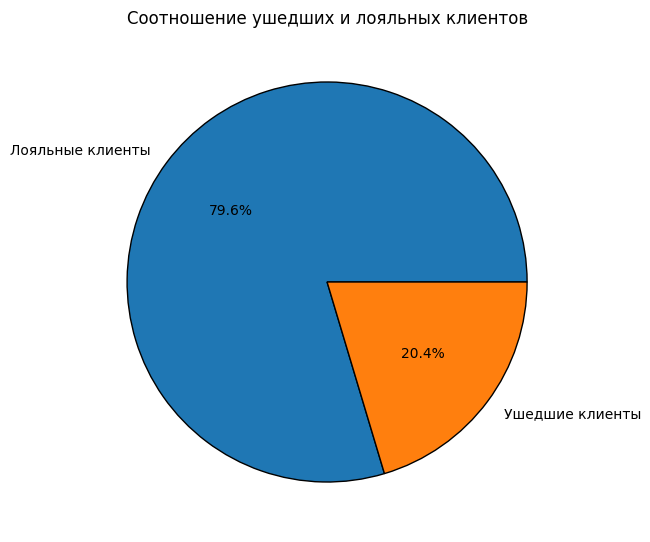

In [3]:
#9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.
import matplotlib.pyplot as plt
%matplotlib inline
clients = churn_data['Exited'].value_counts()
display(clients)
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
labels = ['Лояльные клиенты','Ушедшие клиенты']
axes.pie(
    clients,
    labels = labels,
    autopct='%.1f%%',
    wedgeprops={'lw':1, 'ls':'-','edgecolor':'k'}, 
    )
axes.set_title('Соотношение ушедших и лояльных клиентов')

Комментарий: Из диаграммы видно, что ушедшие клиенты банка составляют пятую часть от общего количества клиентов.
Лояльных клиентов в четыре раза больше, чем ушедших.

Text(0, 0.5, 'Число клиентов')

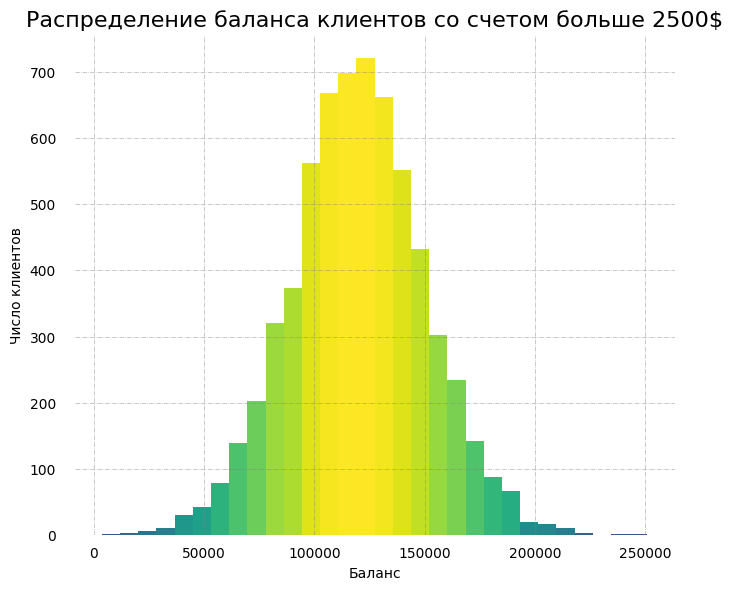

In [4]:
#9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. 
# Опишите распределение и сделайте выводы.
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
mask = churn_data['Balance'] > 2500
balance = churn_data[mask]

fig = plt.figure(figsize=(6,5))
axes = fig.add_axes([0, 0, 1, 1])

# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    axes.spines[s].set_visible(False)
 
# Remove x, y ticks
axes.xaxis.set_ticks_position('none')
axes.yaxis.set_ticks_position('none')
   
# Add padding between axes and labels
axes.xaxis.set_tick_params(pad = 5)
axes.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
axes.grid(visible = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.6)
 

# Creating histogram
N, bins, patches = axes.hist(x=balance['Balance'], bins = 30)
 
# Setting color
fracs = ((N**(1 / 5)) / N.max())
norm = colors.Normalize(fracs.min(), fracs.max())
 
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)
 
# Adding extra features   
plt.xlabel("X-axis")
plt.ylabel("y-axis")

axes.set_title('Распределение баланса клиентов со счетом больше 2500$', fontsize=16)
axes.set_xlabel('Баланс')
axes.set_ylabel('Число клиентов')

На графике видно, что большая часть клиентов имеет баланс в промежутке от 900,000$ до 1,500,000$

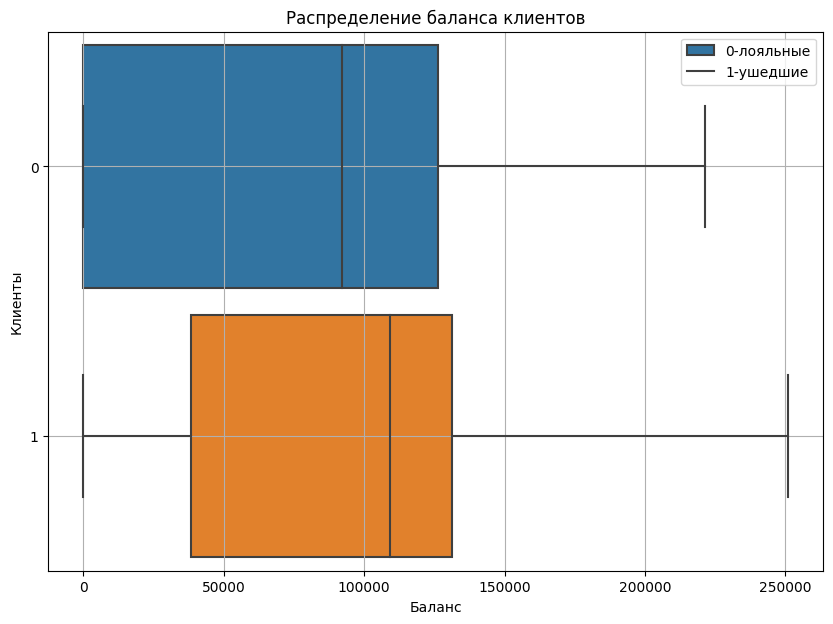

In [36]:
#9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока.
# Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, 
# что может не устраивать ушедших клиентов в банке.
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns



fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=churn_data,
    y='Exited',
    x='Balance',
    orient = 'h',
    width=0.9,
    
)
legend_label = ["0-лояльные",'1-ушедшие'] 



boxplot.set_title('Распределение баланса клиентов');
boxplot.set_xlabel('Баланс');
boxplot.set_ylabel('Клиенты');
boxplot.grid()
boxplot.legend(legend_label)


In [49]:
#9.4. Посмотрите на распределение возраста в разрезе признака оттока. 
# В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?
#fig = plt.figure(figsize=(10, 7))
clients1 = churn_data((churn_data['Exited']==1)['Age'])
display(clients1)
#boxplot = sns.boxplot(
    #data=churn_data,
    #y='Exited',
    #x='Age',
    #orient='h',
    #width=0.9
#)
#boxplot.set_title('Распределение возраста в категории ушедших клиентов');
#boxplot.set_xlabel('Возраст');
#boxplot.set_ylabel('Ушедшие клиенты');
#boxplot.grid()

KeyError: 'Age'